<a href="https://colab.research.google.com/github/janeptn/mlnotebooks/blob/main/Explora%C3%A7%C3%A3o%20e%20Pr%C3%A9-Processamento%20de%20Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploração e Pré-Processamento de Dados**

Limpeza e transformação 

In [ ]:
import pandas as pd
df  =  pd.read_csv('/content/dirtydata.csv')
print(df)
print(df.info()) 

In [ ]:
#Remover as linhas que contêm valores NULL

new_df = df.dropna()
print(new_df.to_string())

# Remove todas as linhas contendo valores NULL do DataFrame original
#df.dropna(inplace = True)


In [ ]:
#Exemplo, substitui NULL por um número

df.fillna(0, inplace = True) #número 0
print(df)

In [ ]:
#Exemplo, substitui NULL por um número apenas para colunas especificadas

df["Calories"].fillna(130, inplace = True) #número 130
print(df)

In [ ]:
#SubstituI usando média, mediana ou moda
#mean() median()e mode()

x = df["Calories"].mean()
print(x)

df["Calories"].fillna(x, inplace = True)
print(df)

In [125]:
#Na linha 26 a coluna 'Date' está no formato string:
df[26:]

,Duration,Date,Pulse,Maxpulse,Calories
26,60,20201226,100,120,250.0
27,60,'2020/12/27',92,118,241.0
28,60,'2020/12/28',103,132,NaN
29,60,'2020/12/29',100,132,280.0
30,60,'2020/12/30',102,129,380.3
31,60,'2020/12/31',92,115,243.0


In [126]:
#Converte para formato datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].iloc[26:]

26   2020-12-26
27   2020-12-27
28   2020-12-28
29   2020-12-29
30   2020-12-30
31   2020-12-31
Name: Date, dtype: datetime64[ns]

In [127]:
#Remove as linhas com um valor NULL (NaT) na coluna "Data" - linha 22 
df.dropna(subset=['Date'], inplace = True) 

In [ ]:
#Dados incorretos

#Em nosso conjunto de dados, na linha 7, 'Duration' é 450 (poderia ser um outlier, erro de digitação)
#já que os outros valores está entre 30 e 60
#Podemos corrigir o valor diretamente na linha 7

df.loc[7, 'Duration'] = 45

In [ ]:
#Faça um loop por todos os valores na coluna "Duration"
#Se o valor for superior a 120, defina-o como 120:

for x in df.index:
  if df.loc[x, "Duration"] > 120:
    df.loc[x, "Duration"] = 120

In [ ]:
#Exclua as linhas em que a "Duration" seja superior a 120:
for x in df.index:
  if df.loc[x, "Duration"] > 120:
    df.drop(x, inplace = True)

In [ ]:
#Removendo dados duplicados
#Observando nosso conjunto de dados de teste, podemos assumir que as linhas 11 e 12 são duplicatas

print(df.duplicated())

#Remova todas as duplicatas
df.drop_duplicates(inplace = True)


In [ ]:
#Transformação de atributos
import pandas as pd

dados = pd.DataFrame([[9, 6, 4, 8, 'SP'], [9, 9, 7, 4, 'SP'], [1, 6, 9, 8, 'RJ'], [8, 5, 7, 4, 'RJ'], [5, 7, 8, 7, 'MG'] ])
dados.columns = ['var1', 'var2', 'var3', 'var4', 'var5']

mappings = {'SP': 1, 'RJ': 2, 'MG': 3}
dados['var5'] = dados['var5'].apply(lambda x: mappings[x])

dados

Medidas de dispersão

In [6]:
#Variância 

import numpy as np

valores = [2, 4, 4, 4, 5, 5, 7, 9]

print("Média:", np.mean(valores))

print("Variância:", np.var(valores)) #A variância mede a distância de cada valor no conjunto de dados em relação a média.

Média: 5.0
Variância: 4.0


In [8]:
#Desvio padrão
#Indica o quanto um conjunto de dados é uniforme. Quanto mais próximo de 0 for o desvio padrão, mais homogêneo são os dados.

valores = [2, 4, 4, 4, 5, 5, 7, 9]

print("Desvio Padrão:", np.std(valores)) 

Desvio Padrão: 2.0


In [ ]:
import pandas as pd

dados = pd.DataFrame([[9, 6, 4, 8], [9, 9, 7, 4], [1, 6, 9, 8], [8, 5, 7, 4]])
dados.columns = ['var1', 'var2', 'var3', 'var4']

desvio_p = dados.std()
variancia = dados.var()

print(variancia)
print(desvio_p)

In [ ]:
dados.describe()['var1']

In [ ]:
dados.describe()

Visualização 

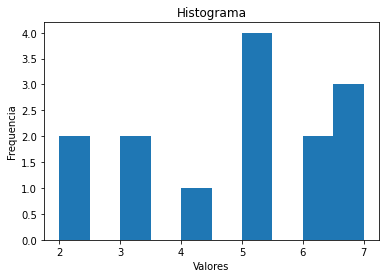

In [63]:
#Histograma

import numpy as np
import matplotlib.pyplot as pyplt

valores = np.array([2, 5, 7, 3, 4, 6, 5, 2, 6, 5, 5, 3, 7, 7])
pyplt.hist(valores) #, bins = 'auto')
pyplt.title('Histograma')
pyplt.ylabel('Frequencia')
pyplt.xlabel('Valores')
pyplt.show()

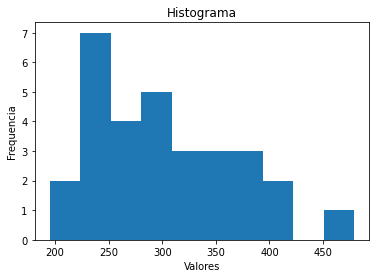

In [96]:
#Histograma

import pandas as pd
import matplotlib.pyplot as pyplt

df  =  pd.read_csv('/content/dirtydata.csv')

valores = df['Calories']
pyplt.hist(valores) #, bins = 'auto')
pyplt.title('Histograma')
pyplt.ylabel('Frequencia')
pyplt.xlabel('Valores')
pyplt.show()

Outliers

In [ ]:
df.describe()

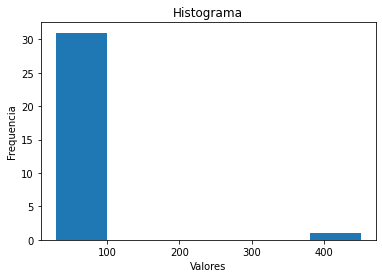

In [99]:
valores = df['Duration']
pyplt.hist(valores, bins = 'auto')
pyplt.title('Histograma')
pyplt.ylabel('Frequencia')
pyplt.xlabel('Valores')
pyplt.show()

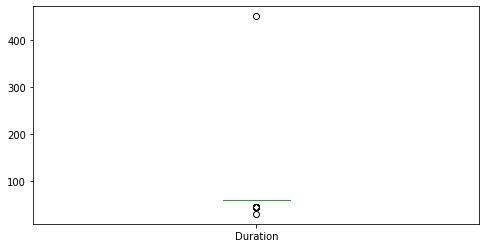

In [102]:
df['Duration'].plot(kind = 'box', figsize = (8, 4))
pyplt.show ()

Desbalanceamento 

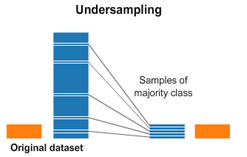

In [103]:
#import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

iris = datasets.load_iris()

#Dividindo em X e y (Class labels)
X = iris.data  
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.5)

In [102]:
# técnica under-sampling
rus = RandomUnderSampler()
#X_res, y_res = rus.fit_sample(X_train, y_train)
X_res, y_res = rus.fit_resample(X_train, y_train)

print(X_train.shape)
print(y_train.shape)

print(X_res.shape)
print(y_res.shape)

(75, 4)
(75,)
(60, 4)
(60,)


Redução de dimensionalidade

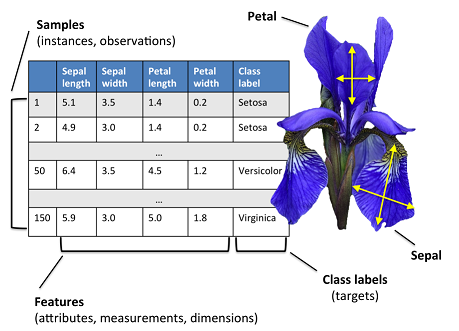

In [ ]:
#PCA - Principal Component Analisys

#import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()

print(iris)


In [52]:
#Dividindo em X e y (Class labels)

X = iris.data  
y = iris.target

In [53]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

print(Y_sklearn)

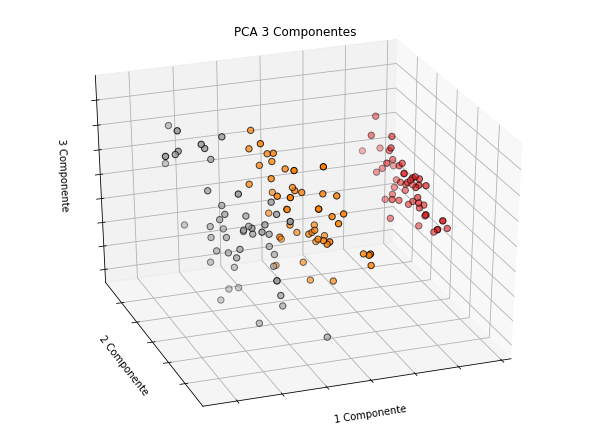

In [62]:
fig = plt.figure(1, figsize=(8, 6))

ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(
    Y_sklearn[:, 0],
    Y_sklearn[:, 1],
    Y_sklearn[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("PCA 3 Componentes")
ax.set_xlabel("1 Componente")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2 Componente")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3 Componente")
ax.w_zaxis.set_ticklabels([])

plt.show()